IMPORTING LIBRARIES AND DATA SET.

In [35]:
# Importing libraries that may be needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
jfk_data = pd.read_csv('M1_final.csv')
jfk_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


EXPLORATORY DATA ANALYSIS

In [37]:
# Taking a look at the data.
print(jfk_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   28820 non-null  int64  
 1   DAY_OF_MONTH            28820 non-null  int64  
 2   DAY_OF_WEEK             28820 non-null  int64  
 3   OP_UNIQUE_CARRIER       28820 non-null  object 
 4   TAIL_NUM                28820 non-null  object 
 5   DEST                    28820 non-null  object 
 6   DEP_DELAY               28820 non-null  int64  
 7   CRS_ELAPSED_TIME        28820 non-null  int64  
 8   DISTANCE                28820 non-null  int64  
 9   CRS_DEP_M               28820 non-null  int64  
 10  DEP_TIME_M              28820 non-null  int64  
 11  CRS_ARR_M               28820 non-null  int64  
 12  Temperature             28820 non-null  int64  
 13  Dew Point               28820 non-null  int64  
 14  Humidity                28820 non-null

In [ ]:
# Looking at the data types, I have decided to go with one of these columns for our exercise: Temperature ,Dew Point ,Humidity ,Wind Speed ,Wind Gust , Pressure & TAXI_OUT as the columns needed for the project.
# This is because I beleive they directly impact plane travel times.
# I think that Wind and Condition should also be included but I don't know yet how to work with objects in datasets for Linear Regression.

In [38]:
# Looking at the data types, I can see 'Dew Point' is listed as an object even though it is only numbers in the .csv file.
# Let's look at the unique values in the data

type = jfk_data['Dew Point'].unique()
print(type)

[34 32 33 31 30 29 67 35 36 38 39 40 41 42 28 27 46 37 44 45 52 53 54 56
 57 59 58 50 43 48 49 47 21 20 22 24 23 19 18 16 13 12 14 15 17 26 25 51
 55  6  9  5  8 10  4  7  3  2 11  0 -1  1 -2 -3]


In [39]:
# Since most of the values are numbers with a few corrupted values, I'm keeping 'Dew Point' in the data set but will clean it.

DATA CLEANING

In [40]:
# This code removes any non integers from "Dew point".

dropping_dews = pd.read_csv('D:/TDA/M1_final.csv')

# Remove "\xa0" from single value integers
dropping_dews['Dew Point'] = dropping_dews['Dew Point'].astype(str).str.replace('\xa0', '', regex=True)
dropping_dews['Dew Point'] = pd.to_numeric(dropping_dews['Dew Point'], errors='coerce')


# Save the cleaned data
dropping_dews.to_csv('D:/TDA/dew_dropped.csv', index=False)

In [41]:
# Let's take anothe look at "Dew Point"
type = dropping_dews['Dew Point'].unique()
print(type)

[34 32 33 31 30 29 67 35 36 38 39 40 41 42 28 27 46 37 44 45 52 53 54 56
 57 59 58 50 43 48 49 47 21 20 22 24 23 19 18 16 13 12 14 15 17 26 25 51
 55  6  9  5  8 10  4  7  3  2 11  0 -1  1 -2 -3]


In [42]:
# Let's take a look at that data again
print(dropping_dews .info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   28820 non-null  int64  
 1   DAY_OF_MONTH            28820 non-null  int64  
 2   DAY_OF_WEEK             28820 non-null  int64  
 3   OP_UNIQUE_CARRIER       28820 non-null  object 
 4   TAIL_NUM                28820 non-null  object 
 5   DEST                    28820 non-null  object 
 6   DEP_DELAY               28820 non-null  int64  
 7   CRS_ELAPSED_TIME        28820 non-null  int64  
 8   DISTANCE                28820 non-null  int64  
 9   CRS_DEP_M               28820 non-null  int64  
 10  DEP_TIME_M              28820 non-null  int64  
 11  CRS_ARR_M               28820 non-null  int64  
 12  Temperature             28820 non-null  int64  
 13  Dew Point               28820 non-null  int64  
 14  Humidity                28820 non-null

In [43]:
# All our selected predictor variables are numbers, with that our data cleaning is done.

LINEAR REGRESSION

In [44]:
# Let's start by definig our cleaned data set
jfk_data2 = pd.read_csv('dew_dropped.csv')
jfk_data2.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [45]:
# Defining  out predictor and target variable, for this execise I chose wind speed.

# Predictor variable in an array
X = jfk_data2['Wind Speed '].values.reshape(-1,1)

# Target variable in an array
y = jfk_data2['TAXI_OUT'].values.reshape(-1,1)

In [46]:
# Here we split our data into training and testing sets then create our model. 

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

y_pred

array([[20.90429606],
       [22.35385722],
       [21.26668635],
       ...,
       [21.77403276],
       [21.48412053],
       [20.90429606]])

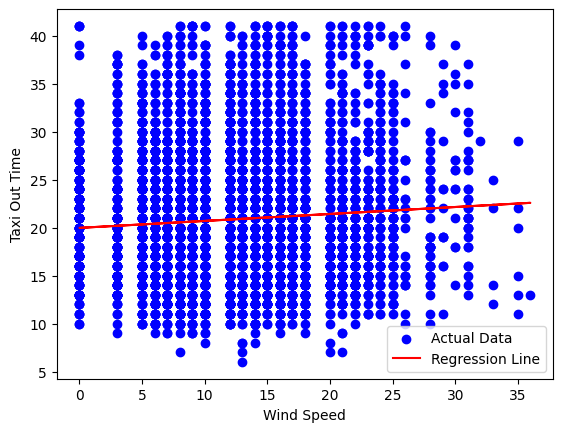

In [48]:
# Now let's visualize our predicted values 
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Wind Speed')
plt.ylabel('Taxi Out Time')
plt.legend()
plt.show()

FINE TUNING

In [19]:
# We can see that our predicted values are highly biased towards the 20 - 25 range. We need to find a way to remove this bias, let's try StandardScaler first.

In [20]:
# Define StandardScaler 
scaler = StandardScaler()

# Scale our predictor and target variable 
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

In [21]:
# Refit the scaled model to the scaled predictor variable and make a new linear regression model based off it.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Set our new y_pred to the updated linear regresssion.
y_pred = model.predict(X_test)

y_pred

array([[20.90429606],
       [22.35385722],
       [21.26668635],
       ...,
       [21.77403276],
       [21.48412053],
       [20.90429606]])

In [ ]:
# It looks like the dat is still biased. Let's get the mean and R squared figures of our scaled data to see how it performs.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 47.83596207477186
R-squared Score: 0.001952877788999996


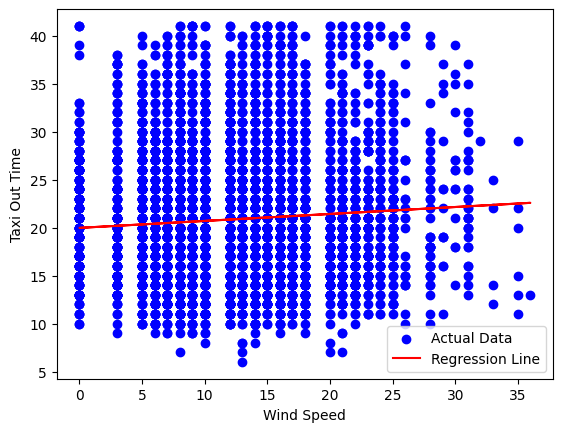

In [34]:
# Now let's visualize our predicted values 
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Wind Speed')
plt.ylabel('Taxi Out Time')
plt.legend()
plt.show()

CONCLUSION

In [ ]:
# After using standard scaler on our linear regression model we can conclude that a single predictor variable will underfit the data even with fine turning.
# Either a multi variable approach or a method that is good at handling diverese data sets such as "RandomForest" is prefferable. 